# Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [1]:
import pandas as pd

In [14]:
# read in data
df = pd.read_excel('Alarm Survey Data.xlsx')
pd.read_excel('Alarm Survey Data.xlsx')


,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [16]:
# check the data types
df.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [24]:
# change the alarm rating column to a numeric column
df.alarm_rating.str.replace('stars', '')

0       5 
1       3 
2       1 
3       4 
4       3 
        ..
6428    5 
6429    4 
6430    3 
6431    3 
6432    1 
Name: alarm_rating, Length: 6433, dtype: object

## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [26]:
# check for missing data
df.isna()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6428,False,False,False,False,False,False,False
6429,False,False,False,False,False,False,False
6430,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False


In [30]:
# see the rows with missing data
df.isna().sum()

survey_id               0
age                     0
number_of_children      0
activity_level          0
sleep_quality         351
number_of_snoozes       0
alarm_rating            0
dtype: int64

In [36]:
# look at the sleep quality values
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4 stars
18,19,38,2.0,lightly active,NaN,1,5 stars
23,24,24,2.0,very active,NaN,1,5 stars
26,27,25,2.0,lightly active,NaN,1,2 stars
28,29,29,2.0,lightly active,NaN,1,2 stars
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3 stars
6319,6320,44,2.0,lightly active,NaN,0,3 stars
6375,6309,32,3.0,light,NaN,0,3 stars
6377,6311,30,2.0,very active,NaN,0,3 stars


In [52]:
# update sleep quality NaNs to 1
df['sleep_quality'] = df['sleep_quality'].fillna(1)
df.isna().sum()

survey_id             0
age                   0
number_of_children    0
activity_level        0
sleep_quality         0
number_of_snoozes     0
alarm_rating          0
dtype: int64

In [60]:
# sleep quality values
df.sleep_quality

0       3.0
1       3.0
2       4.0
3       4.0
4       1.0
       ... 
6428    5.0
6429    4.0
6430    5.0
6431    5.0
6432    4.0
Name: sleep_quality, Length: 6433, dtype: float64

## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [66]:
# check the numerical columns
df["age"].describe()

count    6433.000000
mean       29.069175
std         7.472048
min        13.000000
25%        23.000000
50%        28.000000
75%        34.000000
max        47.000000
Name: age, dtype: float64

In [68]:
# look into number of children -- it just means 5+ kids, leave as is
df["number_of_children"].describe()

count    6433.000000
mean        1.395616
std         1.432192
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.500000
Name: number_of_children, dtype: float64

In [82]:
# check the categorical columms
df["activity_level"].value_counts()

activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64

In [116]:
# map the lightly active values to one value
import numpy as np

activity_level_mapping = {
    "lightly active": "light_activity", 
    "active": "active",
    "light_activity": "light_activity",
    "very active": "very active",
    "light": "light",
}
df['activity_level_clean'] = df['activity_level'].map(activity_level_mapping)
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating,activity_level_clean
0,1,34,3.0,active,3.0,1,5 stars,active
1,2,31,3.0,light,3.0,3,3 stars,light
2,3,18,0.0,light_activity,4.0,1,1 stars,light_activity
3,4,42,4.0,active,4.0,1,4 stars,active
4,5,30,1.0,light_activity,1.0,4,3 stars,light_activity
...,...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars,active
6429,6363,31,1.0,light,4.0,0,4 stars,light
6430,6364,26,0.0,lightly active,5.0,0,3 stars,light_activity
6431,6365,27,1.0,active,5.0,0,3 stars,active


In [120]:
# check the categorical columms
df["activity_level_clean"].value_counts()

activity_level_clean
light_activity    2980
active            2450
very active        669
light              334
Name: count, dtype: int64

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [136]:
# check for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6428     True
6429     True
6430     True
6431     True
6432     True
Length: 6433, dtype: bool

In [138]:
# drop duplicates
df.drop_duplicates()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating,activity_level_clean
0,1,34,3.0,active,3.0,1,5 stars,active
1,2,31,3.0,light,3.0,3,3 stars,light
2,3,18,0.0,light_activity,4.0,1,1 stars,light_activity
3,4,42,4.0,active,4.0,1,4 stars,active
4,5,30,1.0,light_activity,1.0,4,3 stars,light_activity
...,...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5 stars,active
6362,6363,31,1.0,light,4.0,0,4 stars,light
6363,6364,26,0.0,lightly active,5.0,0,3 stars,light_activity
6364,6365,27,1.0,active,5.0,0,3 stars,active


In [140]:
# alternative: save non-duplicates


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

In [147]:
# look at the histograms of all numeric columns

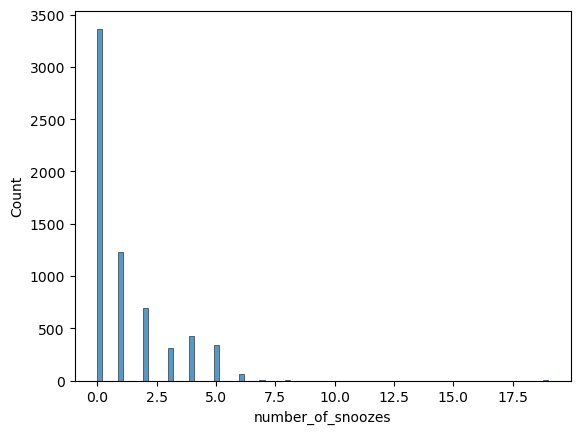

In [156]:
# look at the histogram of the number of snoozes
import seaborn as sns
sns.histplot(df.number_of_snoozes);

<Axes: xlabel='number_of_snoozes'>

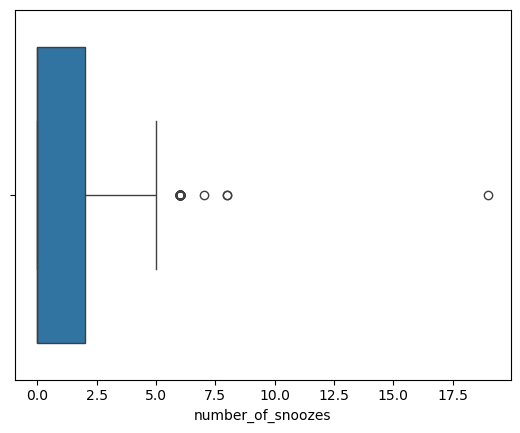

In [158]:
# look at the boxplot of the number of snoozes
sns.boxplot(x=df.number_of_snoozes)

In [172]:
# look into number of snoozes
df.number_of_children.describe()

count    6370.000000
mean        1.386656
std         1.430450
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.500000
Name: number_of_children, dtype: float64

In [174]:
# let's only remove the extreme outlier
rows_to_drop = df[df['number_of_snoozes'] > 5].index
df = df.drop(index=rows_to_drop)
df.number_of_children.describe()

count    6370.000000
mean        1.386656
std         1.430450
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.500000
Name: number_of_children, dtype: float64

## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [178]:
# check for missing values


In [180]:
# check for inconsistent text


In [182]:
# check for duplicate values


In [184]:
# check for outliers


In [186]:
# first round of data cleaning is complete!


## 7. Create Columns From Numeric Data

* Read in data from the Excel spreadsheet (Pen Sales Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [ ]:
import pandas as pd

In [194]:
# read in data
pen_sales = pd.read_excel('Pen Sales Data.xlsx')
pen_sales

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te..."
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...


In [196]:
# check the data types
pen_sales.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
dtype: object

In [200]:
# create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
pen_sales['Total Spend'] = pen_sales['Pen Cost'] + pen_sales['Shipping Cost']
pen_sales

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...,16.98
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...,14.98
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te...",14.98
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...,8.98
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...,19.98


In [204]:
# create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise
import numpy as np
pen_sales['Free Shipping'] = np.where(pen_sales['Shipping Cost'] == 0.00, 'yes', 'no')
pen_sales


,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...,16.98,no
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...,14.98,no
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te...",14.98,no
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...,8.98,no
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...,19.98,no


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [215]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
pen_sales['Delivery Time'] = pen_sales['Delivery Date'] - pen_sales['Purchase Date']
pen_sales

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no,2 days
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...,16.98,no,3 days
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...,14.98,no,2 days
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te...",14.98,no,6 days
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...,8.98,no,5 days
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...,19.98,no,1 days


In [219]:
# What were the average days from purchase to delivery?
pen_sales['Delivery Time'].sum()/24

Timedelta('3 days 09:00:00')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [221]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# split a column into multiple column
two_fields = pen_sales['Review'].str.split('|')
two_fields

0     [DoodleWithMe, I love the way this pen writes,...
1     [ScribbleMaster, The classic Sharpie marker ha...
2     [PenPalForever, The retractable ballpoint pen ...
3     [TheWriteWay, This gel pen has a comfortable g...
4     [PenAndPaperPerson, The rollerball pen has a s...
5     [SmoothOperatorPen, This gel pen writes smooth...
6     [InkStainedFingers, This pen is prone to leaki...
7     [BoldInkWriter, Unfortunately, this pen has a ...
8     [PenmanshipPro, The gel pen has a comfortable ...
9     [GelPenGuru, This retractable gel pen has a fi...
10    [FinePointFan, Be careful with this pen, as it...
11    [SignatureStylePen, The retractable ballpoint ...
12                              [BoldAndBeautifulPen, ]
13    [RollerballRider, The ink in this pen has a te...
14    [BallpointBandit, This ballpoint pen has a sle...
15    [TwistAndWriteUser, The ink in this pen can so...
16                                  [ThePenWhisperer, ]
17    [InkFlowFollower, I was disappointed to fi

In [223]:
# put columns back into original dataframe
pd.DataFrame(two_fields.to_list(),
            columns=['Name', 'Review'])

,Name,Review
0,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,TheWriteWay,This gel pen has a comfortable grip and writes...
4,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."
5,SmoothOperatorPen,"This gel pen writes smoothly with a bold, vibr..."
6,InkStainedFingers,This pen is prone to leaking and can create a ...
7,BoldInkWriter,"Unfortunately, this pen has a tendency to spil..."
8,PenmanshipPro,The gel pen has a comfortable grip and writes ...
9,GelPenGuru,This retractable gel pen has a fine point that...


In [227]:
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”
pen_sales['Contains Leak or Spill'] = pen_sales['Review'].str.contains('leak|spill')
pen_sales

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,Contains Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no,2 days,True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes,3 days,False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no,1 days,False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no,3 days,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no,2 days,False
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...,16.98,no,3 days,False
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...,14.98,no,2 days,True
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te...",14.98,no,6 days,True
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...,8.98,no,5 days,False
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...,19.98,no,1 days,False
